# Exercise 2

In this notebook, we will implement the gradient descent using PyTorch.
The data generation is the same as in the previous notebook.

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [9]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1000, 1])
torch.Size([1000, 1])
torch.float32
torch.float32


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

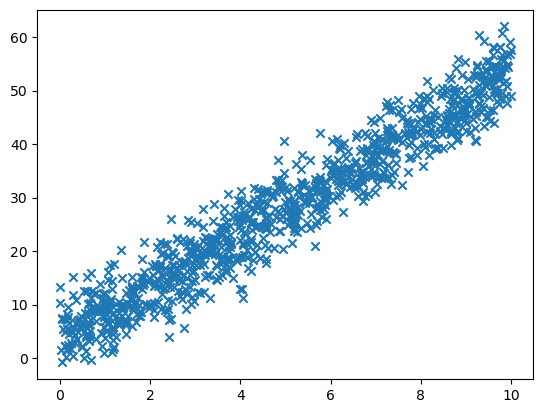

In [11]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient descent calculation from the first notebook, but use pytorch for the calculations instead of numpy. To do this, you will need to do the following:
   - Import your (augmented) X, y numpy tensors into pytorch using `torch.as_tensor(name_of_numpy_array)`. For the weights, create them using numpy as in the first notebook, then convert them to pytorch with `weights = torch.tensor(weights, requires_grad=True)`. This tells pytorch to calculate gradients for this tensor. PyTorch tensors and numpy arrays behave very similarly, which means that the code for your calculations should be essentially the same.
   - After calculating the loss, you do not need to calculate the gradient manually. You can use `loss.backward()` if loss is the variable that contains the final loss value. Then, you can access the gradient using `weights.grad`.
   - When updating the weights, wrap it with a block of
   ```python
   with torch.no_grad():
        # weight update here
   ```
   This tells pytorch to not calculate a gradient for the `-=` operation that updates the weight tensor (which would cause an error).
   - When coding the loop, make sure to reset the gradient calculation after or before each update using `weights.grad.zero_()`. This ensures that the gradients do not accumulate across multiple loop iterations.
 - If you implement it correctly, you should get the same results as in the first notebook (the gradients should be the same, too).

## Solution

Gradients after first iteration: tensor([[-366.0398],
        [ -56.3095]])
Iteration 0, Loss: 1030.599609375
Iteration 100, Loss: 15.244744300842285
Iteration 200, Loss: 15.041094779968262
Iteration 300, Loss: 14.966343879699707
Iteration 400, Loss: 14.938905715942383
Iteration 500, Loss: 14.9288330078125
Iteration 600, Loss: 14.925135612487793
Iteration 700, Loss: 14.92378044128418
Iteration 800, Loss: 14.9232816696167
Iteration 900, Loss: 14.923097610473633


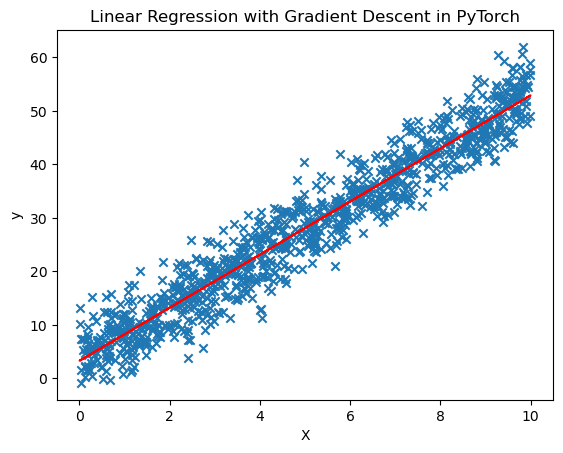

In [13]:

import torch



# Convert numpy arrays to PyTorch tensors
X = torch.as_tensor(X, dtype=torch.float32)
y = torch.as_tensor(y, dtype=torch.float32)

# Generate initial weights using numpy and convert to PyTorch tensor
def generate_weights(num_features):
    np.random.seed(42)
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights_numpy = generate_weights(X.shape[-1] + 1)
weights = torch.tensor(weights_numpy, requires_grad=True, dtype=torch.float32)

# Augment X with a column of ones for bias
X_bias = torch.cat((X, torch.ones(n_samples, 1)), dim=1)

# Gradient descent loop
lr = 0.01  # Learning rate
n_iter = 1000  # Number of iterations

for i in range(n_iter):
    # Calculate predictions
    y_pred = torch.mm(X_bias, weights)

    # Calculate loss
    loss = torch.mean((y - y_pred) ** 2)

    # Backward pass
    loss.backward()

    # Print gradients after first iteration for verification
    if i == 0:
        print(f"Gradients after first iteration: {weights.grad}")

    # Update weights
    with torch.no_grad():
        weights -= lr * weights.grad

    # Zero the gradients
    weights.grad.zero_()

    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

# Plotting the results
plt.scatter(X.numpy(), y.numpy(), marker='x')
with torch.no_grad():
    plt.plot(X.numpy(), torch.mm(X_bias, weights).numpy(), color='red')
plt.title("Linear Regression with Gradient Descent in PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
